/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_57828/1793555471.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edge_color'] = '#ea6969'  # Default edge color
/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_57828/1793555471.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['face_color'] = 'none'  # Blank face color
/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_57828/1793555471.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

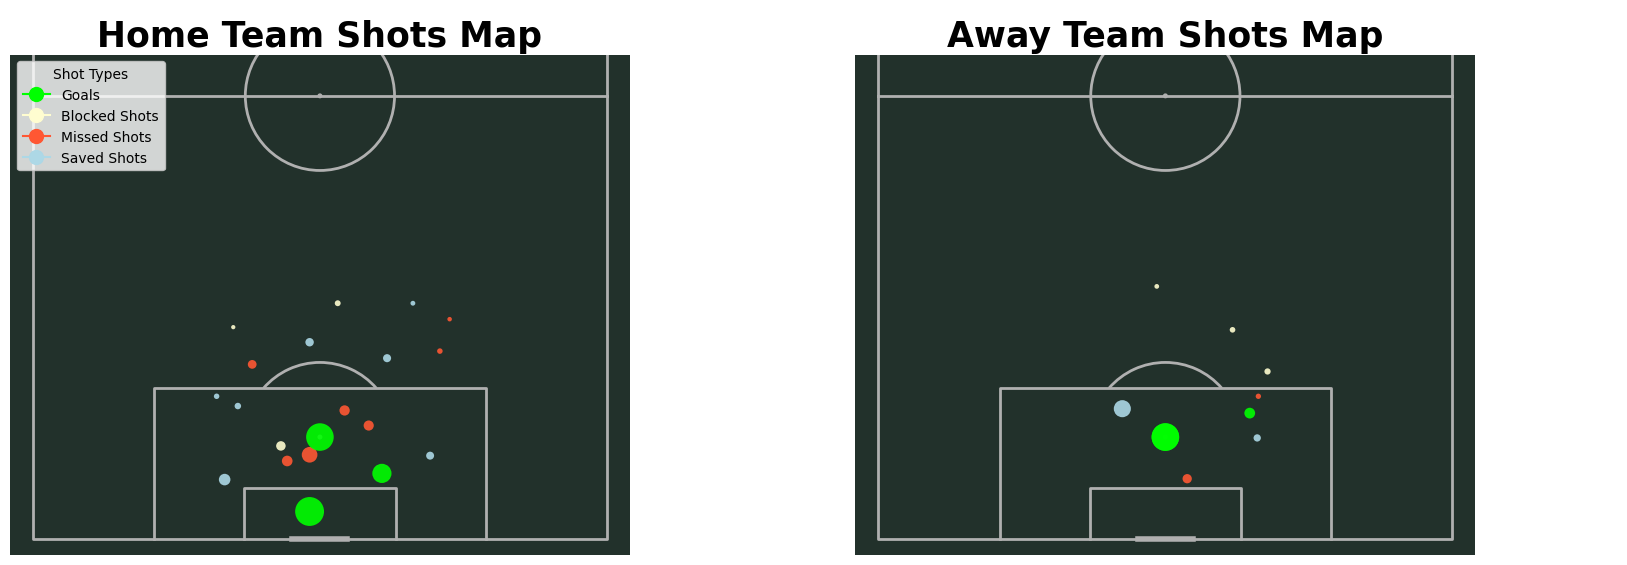

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch

def plot_shotmap(match_id):
    
    # Fetch the shotmap data
    response = requests.get(f'https://sofascore.com/api/v1/event/{match_id}/shotmap')
    shots = response.json()

    # Normalize the shotmap data into a DataFrame
    df = pd.json_normalize(shots['shotmap'])
    
    df = df[df['situation'] != 'shootout']
    
    # Define the selected columns
    selected_columns = ['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
                        'xg', 'id', 'time', 'addedTime', 'timeSeconds', 'reversedPeriodTime',
                        'reversedPeriodTimeSeconds', 'incidentType', 'player.name', 'player.position', 
                        'player.jerseyNumber', 'player.id', 'playerCoordinates.x', 'playerCoordinates.y', 
                        'playerCoordinates.z', 'goalMouthCoordinates.x', 'goalMouthCoordinates.y', 
                        'goalMouthCoordinates.z', 'blockCoordinates.x', 'blockCoordinates.y', 'blockCoordinates.z', 
                        'draw.start.x', 'draw.start.y', 'draw.block.x', 'draw.block.y', 'draw.end.x', 'draw.end.y', 
                        'draw.goal.x', 'draw.goal.y', 'goalType', 'xgot']

    # Filter the DataFrame to include only the selected columns
    result_df = df[selected_columns]
    
    # Shift the 'draw.start.x' column values
    #shift_value = 10  
    #result_df['draw.start.x'] -= shift_value

    # Filter result_df where 'isHome' column is true
    result_df_home = result_df[result_df['isHome']]
    # Filter result_df where 'isHome' column is false
    result_df_away = result_df[~result_df['isHome']]

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 6.5))

    for ax, df, title in zip(axes, [result_df_home, result_df_away], ['Home', 'Away']):
        # Create a VerticalPitch with half=True need to pad since the coords are for the bottom half.
        pitch = VerticalPitch(pitch_type='opta', half=True, pad_top=-70, pad_bottom=80, pitch_color='#22312b')  # Set background color to #22312b

        # Get the figure and axis objects from the pitch
        pitch.draw(ax=ax)

        df['edge_color'] = '#ea6969'  # Default edge color
        df['face_color'] = 'none'  # Blank face color

        # Change the edge color based on shot type
        df.loc[df['shotType'] == 'goal', 'edge_color'] = '#00FF00'  # Goal
        df.loc[df['shotType'] == 'block', 'edge_color'] = '#fffdd0'  # Block
        df.loc[df['shotType'] == 'miss', 'edge_color'] = '#FF5733'  # Miss
        df.loc[df['shotType'] == 'save', 'edge_color'] = '#ADD8E6'  # Save

        # Draw the scatter plot on the main pitch with solid circles and respective edge colors
        scatter = ax.scatter(df['draw.start.x'], df['draw.start.y'], facecolors=df['edge_color'],
                             edgecolors='none', marker='o', s=df['xg']*500, linewidth=1, alpha=.9, label='Shots Missed')

        # Customize the scatter plot as needed
        ax.set_title(f'{title} Team Shots Map', c='black', fontsize=25, weight='bold')

    # Add legend with handles using the same edge color and face color as shots
    legend_labels = {'goal': 'Goals', 'block': 'Blocked Shots', 'miss': 'Missed Shots', 'save': 'Saved Shots'}
    handles = [
        plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markeredgecolor=color, markersize=10, label=label)
        for color, label in zip(['#00FF00', '#fffdd0', '#FF5733', '#ADD8E6'], legend_labels.values())
    ]
    axes[0].legend(handles=handles, title='Shot Types', loc='upper left')

    # Add annotation in the top right corner
    plt.annotate('Circle Sizes Represent xG', xy=(0.95, 0.95), xycoords='figure fraction', ha='right', va='top',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='white', alpha=0.7), fontsize=14)

    plt.show()

# Call the function
plot_shotmap(10230635)